In [1]:
from model import VQModel

import torch

In [2]:
model = VQModel()

Working with z of shape (1, 256, 32, 32) = 262144 dimensions.


In [3]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(model)

68718467

In [4]:
model

VQModel(
  (encoder): Encoder(
    (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (down): ModuleList(
      (0-1): 2 x Module(
        (block): ModuleList(
          (0-1): 2 x ResnetBlock(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
            (dropout): Dropout(p=0.0, inplace=False)
            (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          )
        )
        (attn): ModuleList()
        (downsample): Downsample(
          (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
        )
      )
      (2): Module(
        (block): ModuleList(
          (0): ResnetBlock(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (no

In [5]:
sd = torch.load('../weights/vqgan.ckpt', map_location='cpu')['state_dict']
model.load_state_dict(sd, strict=False)

_IncompatibleKeys(missing_keys=[], unexpected_keys=['custom_layer.weight', 'custom_layer.bias'])

In [6]:
from model.vqgan.image_tokenizer import ImageTokenizer
tokenizer = ImageTokenizer(model)

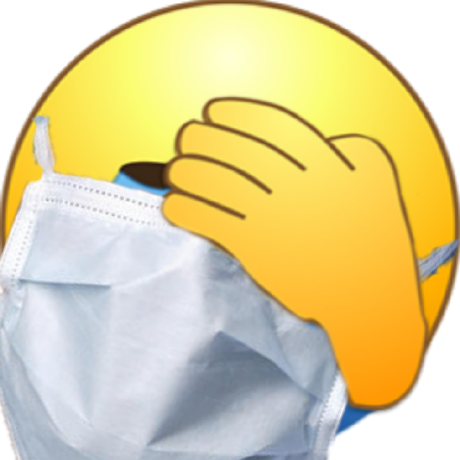

In [7]:
import requests
from io import BytesIO
from PIL import Image
image_url = 'https://avatars.githubusercontent.com/u/25450242?v=4'
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
image

In [8]:
tokens = tokenizer.img_tokens_from_pil(image)
tokens

tensor([2638, 6363, 2638,  ..., 6363, 3158,  573])

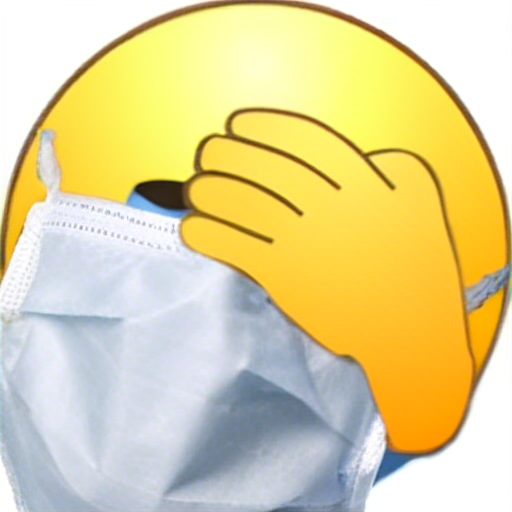

In [9]:
reconstructed_image = tokenizer.pil_from_img_toks(tokens)
reconstructed_image